# Practical Machine Learning – NumPy Exercises

In [1]:
import numpy as np
import pandas as pd

## Question 1 - Numerical Analysis Exercises using NumPy – Rainfall Dataset 

**Dataset details:**
    
- Year
- Month (1 = Jan, 2 = Feb, 3 = March, etc. )
- Total Rainfall (Millimetres)
- Most Rainfall in a Day (Millimetres)
- Number of Rain days (A day is classified as a rain day if it has >= 0.2mm rain) (Number)

In [2]:
f = 'datasets\CorkRainfall.txt'

cork = np.genfromtxt(f, delimiter =' ')
#cork.shape

---

**1. Print out the max ‘Most Rainfall in a Day’ value and the average ‘Most Rainfall in a Day’ value for the Cork data (that is, obtain the maximum value contained in this column of data and the average value in this column of data).**

In [3]:
print("The max ‘Most Rainfall in a Day’ is {:.3}".format(cork[:, 3].max()))
print("The average ‘Most Rainfall in a Day’ is {:.3}".format(cork[:, 3].mean()))

The max ‘Most Rainfall in a Day’ is 86.7
The average ‘Most Rainfall in a Day’ is 22.9


---

**2. Display all unique years for which there is data in the dataset (you can use np.unique). Ask the user to select a specific year. You should then output the sum of the RainDays column for that year (you do this by adding up the "Number of rain days” for all 12 rows pertaining to the selected year).** 

In [4]:
np.unique(cork[:, 0])

array([1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969., 1970.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011.])

In [5]:
year = 2010

cork[cork[:, 0] == year][:, 4].sum()

189.0

---

**3. Calculate the wettest month of the year in Cork based using the “Total Rainfall”
value. The month that has the highest cumulative “Total Rainfall” value across all
years should be classified as the wettest.**

In [6]:
result = None
for month in range(1, 13):
    rain = cork[cork[:, 1] == month][:, 2].sum()
    
    if result is None:
        result = (month, rain)
    elif rain > result[1]:
        result = (month, rain)

print(result)

(1, 6848.1)


In [7]:
from scipy import ndimage
unique = np.unique(cork[:, 1])
result = np.dstack([unique, ndimage.sum(cork[:,2], cork[:,1], unique)])[0][:,1]
print("Wettest month is {} with cumulative rainfall of {} ml.".format(result.argmax()+1, int(result.max())))

Wettest month is 1 with cumulative rainfall of 6848 ml.


In [8]:
cork[cork[:, 1] == 1][:, 2]

array([134.6,  34.8,  35.9, 141.6, 209.8, 121.4,  96.5, 275. , 219.1,
       162.6, 171.3, 129.6, 340.9, 162.8,  90.3, 162.1, 106.4, 112.2,
       134.2,  41.8, 136. , 144.9, 194. , 102. , 105. ,  78. , 256.9,
       100.2, 166.5, 117.6,  40.2, 169.1, 154.7, 178.7, 217. ,  61.4,
       178.5, 140.9,  51.2,  86.6, 242.4,  75.8, 107.7, 124.6,  48.9,
        87.9, 195.1, 201.9, 125.7,  75.8])

---

**4. This question focuses on the Number of Rain days column. The user is asked to enter
a maximum threshold value for the number of rain days. Your code should then
output the percentage of the time (percentage of rows in the dataset) where the
number of rain days is less than or equal to the threshold value.**

In [9]:
threshold = 10

p = cork[cork[:, 4] <= threshold].shape[0] / cork.shape[0] * 100
'{:.2f}%'.format(p)

'8.83%'

---

**5. Calculate the average ‘total rainfall’ value for the summer months (June, July and August) and the Autumn months (Sept, Oct, Nov).**

In [10]:
t = cork[(cork[:, 1] >= 6) & (cork[:, 1] <= 8)][:, 2].mean()
'Avg summer: {:.2f}'.format(t)

'Avg summer: 80.04'

In [11]:
t = cork[(cork[:, 1] >= 9) & (cork[:, 1] <= 11)][:, 2].mean()
'Avg autumn: {:.2f}'.format(t)

'Avg autumn: 114.46'

---

**6. Read in the contents of the file DublinRainfall.txt into a NumPy array. Append the all
rows from the Dublin array to the Cork NumPy array. Calculate the average number
of raindays for the new array and write the new NumPy array to a CSV file.**

In [12]:
f = 'datasets\DublinRainfall.txt'

dublin = np.genfromtxt(f, delimiter =' ')
#dublin.shape

In [13]:
ie = np.concatenate((cork, dublin))

In [14]:
t = ie[:, 4].mean()
'Avg IE: {:.2f}'.format(t)

'Avg IE: 16.70'

In [15]:
np.savetxt('datasets\ie.txt', ie, delimiter=',') 

---

## Question 2 - Numerical Analysis Exercises using NumPy Bike Dataset

**Dataset details:**

0. **instant** : record index
1. **season** : season (1:springer, 2:summer, 3:fall, 4:winter)
2. **yr** : year (0: 2011, 1:2012)
3. **mnth** : month ( 1 to 12)
4. **hr** : hour (0 to 23)
5. **holiday** : weather day is holiday or not (extracted from [Web Link])
6. **weekday** : day of the week
7. **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.
8. **weathersit** :

   **i. 1** : Clear, Few clouds, Partly cloudy, Partly cloudy
   
   **ii. 2** : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
   
   **iii. 3** : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
   
   **iv. 4** : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
9. **temp** : Normalized temperature in Celsius. The values are divided to 41 (max)
10. **atemp** : Normalized feeling temperature in Celsius. The values are divided to 50 (max)
11. **hum** : Normalized humidity. The values are divided to 100 (max)
12. **windspeed** : Normalized wind speed. The values are divided to 67 (max)
13. **casual** : count of casual users
14. **registered** : count of registered users
15. **cnt** : count of total rental bikes including both casual and registered

In [16]:
f = 'datasets/bike.csv'

bike = np.genfromtxt(f, delimiter =',')

---

**1. Calculate the average temperature value (column index 9) for the entire dataset. Note the
temperature values in this column have been already normalized by dividing by 41.**

In [17]:
avg_temp = (bike[:, 9].mean())*41

'{:.3f}'.format(avg_temp)

'20.376'

---

**2. Print out the average number of casual users for all days classified as holidays as well as the
average for all days classified as non-holidays. (Note holidays =1 and non-holidays = 0).
Holidays attribute is stored at index 5.**

In [18]:
avg_hol_user = bike[bike[:, 5] == 1][:, 13].mean()
avg_nhol_user = bike[bike[:, 5] == 0][:, 13].mean()

print('avg_hol_user: {:.2f}, avg_nhol_user: {:.2f}'.format(avg_hol_user, avg_nhol_user))

avg_hol_user: 44.72, avg_nhol_user: 35.41


---

**3. Write NumPy code that will print out the total number of casual users for each month of the
year. You would expect to see an increase in the number of casual users over the summer
months and a decline for the winter months.**

<function matplotlib.pyplot.show(*args, **kw)>

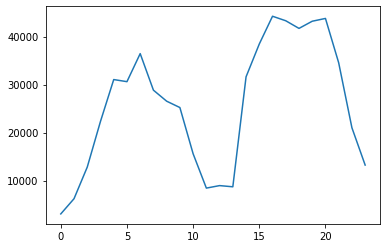

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

total_users = []

for year in np.unique(bike[:, 2]):
    for month in np.unique(bike[:, 3]):
        users = bike[(bike[:, 2] == year) & (bike[:, 3] == month)][:, 13].sum()
        total_users.append(users)
        #print(year, month, users)

plt.plot(total_users)
plt.show

---

**4. We will now look at the relationship between temperature and the number of users (column
index 15). Your code should work out the average number of users for the following temperature
ranges.**

- 1, 6
- 6, 10
- 10, 15
- 15, 20
- 20, 25
- 25, 30
- 30, 35
- 35, 40

Remember the temperature values specified in the file have been normalised by dividing by 41.

[51.85031847133758, 73.66706302021403, 123.71528588098016, 168.44148199445982, 209.50824261275272, 234.74462365591398, 330.33067729083666, 317.92134831460675]


<function matplotlib.pyplot.show(*args, **kw)>

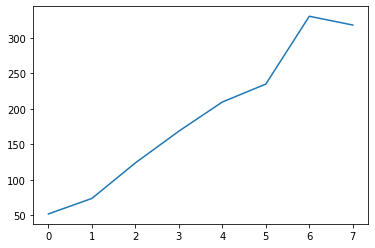

In [20]:
scaler = 41
ranges = [(1, 6), (6, 10), (10, 15), (15, 20), (20, 25), (25, 30), (30, 35), (35, 40)]
avg_users = []

for r in ranges:
    avg_user = bike[(bike[:, 9] >= r[0]/scaler) & (bike[:, 9] <=  (r[1])/scaler)][:, 15].mean()
    avg_users.append(avg_user)

print(avg_users)
plt.plot(avg_users)
plt.show

---

## Question 3 - Numerical Analysis Exercises Pandas – Shark Attack Dataset: 

**Dataset details:**

0. Case Number
1. Date
2. Year
3. Type
4. Country
5. Area
6. Location
7. Activity
8. Name
9. Sex
10. Age
11. Injury
12. Fatal
13. Time
14. Species
15. Investigator or Source

You will notice in the dataset that some entries in the fatality column are recorded as
UNKNOWN, n, F, etc. We ignore these entries and only consider entries that are uppercase ‘Y’
or ‘N’.

In [21]:
f = 'datasets/attacks.csv'
df = pd.read_csv(f, encoding = "utf-8")

df = df[(df.Fatal == 'Y') | (df.Fatal == 'N')]
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2017.06.11,11-Jun-17,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,N,08h30,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6095.0
1,2017.06.10.b,10-Jun-17,2017.0,Unprovoked,AUSTRALIA,Victoria,"Flinders, Mornington Penisula",Surfing,female,F,...,N,15h45,7 gill shark,NaN,2017.06.10.b-Flinders.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.b,2017.06.10.b,6094.0
2,2017.06.10.a,10-Jun-17,2017.0,Unprovoked,USA,Florida,"Ponce Inlet, Volusia County",Surfing,Bryan Brock,M,...,N,10h00,NaN,"Daytona Beach News-Journal, 6/10/2017",2017.06.10.a-Brock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.10.a,2017.06.10.a,6093.0
3,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,...,N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",2017.06.07.R-Thomson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.07.R,2017.06.07.R,6092.0
4,2017.06.04,04-Jun-17,2017.0,Unprovoked,USA,Florida,"Middle Sambo Reef off Boca Chica, Monroe County",Spearfishing,Parker Simpson,M,...,N,NaN,8' shark,"Nine News, 6/7/2017",2017.06.04-Simpson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.04,2017.06.04,6091.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5957 entries, 0 to 6093
Data columns (total 22 columns):
Case Number               5957 non-null object
Date                      5957 non-null object
Year                      5957 non-null float64
Type                      5955 non-null object
Country                   5914 non-null object
Area                      5566 non-null object
Location                  5470 non-null object
Activity                  5481 non-null object
Name                      5779 non-null object
Sex                       5434 non-null object
Age                       3345 non-null object
Injury                    5956 non-null object
Fatal                     5957 non-null object
Time                      2831 non-null object
Species                   3057 non-null object
Investigator or Source    5942 non-null object
pdf                       5957 non-null object
href formula              5956 non-null object
href                      5956 non-null object

---

**1. What location globally has the highest number of shark attacks?**

In [23]:
mode = df.Location.mode()[0]
mode

'New Smyrna Beach, Volusia County'

In [24]:
df[df.Location == mode].shape

(162, 22)

---

**2. Read the shark attack dataset into a Pandas Dataframe.
Determine the six countries that have experienced the highest number of shark attacks.**

In [25]:
# top6 = df.groupby(['Country']).count().sort_values(["Case Number"], ascending=False).take(range(6))
top6 = df.Country.value_counts().head(6)
top6

USA                 2129
AUSTRALIA           1266
SOUTH AFRICA         564
PAPUA NEW GUINEA     130
NEW ZEALAND          123
BAHAMAS              101
Name: Country, dtype: int64

---

**3. Modify your code to print out the six countries that have experienced the highest number of fatal
shark attacks.**

In [26]:
fatal6 = df[df.Fatal == 'Y'].Country.value_counts().head(6)
fatal6

AUSTRALIA           342
USA                 250
SOUTH AFRICA        137
PAPUA NEW GUINEA     56
MEXICO               44
BRAZIL               40
Name: Country, dtype: int64

---

**4. Based on the data in the Activity column are you more likely to be attacked by a shark if you are
“Surfing” or “Scuba Diving”.**

In [27]:
surf = df[df.Activity == 'Surfing'].shape[0]
scuba = df[df.Activity == 'Scuba Diving'].shape[0]

'Surf: {}, Scuba: {}'.format(surf, scuba)

'Surf: 921, Scuba: 5'

---

**5. Determine from the dataset what percentage of all recorded shark attacks were fatal.**

In [28]:
fatality = df[df.Fatal == 'Y'].shape[0] / df.shape[0]
'Fatality is {:.1%}'.format(fatality)

'Fatality is 26.3%'

---

**6. For each individual country, print out the percentage of fatal shark attacks (number of fatal shark attacks expressed as a percentage of the total number of shark attacks). Some countries have recorded 0 fatal and non-fatal attacks. Your code should only consider countries where the number of non-fatal and fatal attacks are greater than 0.**

In [29]:
fatal_y = df[df.Fatal == "Y"][["Country", "Fatal"]].groupby(["Country"]).count()
fatal_n = df[df.Fatal == "N"][["Country", "Fatal"]].groupby(["Country"]).count()
fatal_y= fatal_y.rename(columns={"Fatal": "Fatal_Y"})
fatal_n= fatal_n.rename(columns={"Fatal": "Fatal_N"})

In [30]:
fatal = pd.concat([fatal_n, fatal_y], axis=1, sort=False).fillna(value=0)
fatal["Percentage"] = (fatal.Fatal_Y / (fatal.Fatal_Y + fatal.Fatal_N)) *100

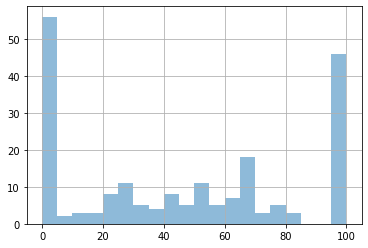

In [31]:
fatal.Percentage.hist(bins=20, alpha=0.5)

In [32]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fatal)

                                       Fatal_N  Fatal_Y  Percentage
 TONGA                                     1.0      2.0   66.666667
ADMIRALTY ISLANDS                          1.0      0.0    0.000000
ANGOLA                                     1.0      0.0    0.000000
ANTIGUA                                    1.0      0.0    0.000000
ARGENTINA                                  1.0      0.0    0.000000
ASIA?                                      1.0      0.0    0.000000
ATLANTIC OCEAN                             8.0      7.0   46.666667
AUSTRALIA                                924.0    342.0   27.014218
AZORES                                     5.0      0.0    0.000000
BAHAMAS                                   89.0     12.0   11.881188
BARBADOS                                   2.0      4.0   66.666667
BELIZE                                     1.0      2.0   66.666667
BERMUDA                                   12.0      3.0   20.000000
BRAZIL                                    61.0  